In [2]:
from model_performances import *
import matplotlib.pyplot as plt

In [3]:
sanity_checks()
questions_dir = f'{DATA_PATH}/questions_m1'
questions_by_id = gather_questions(questions_dir)
data_all, missing_data = gather_data(questions_by_id)

checks passed
data is gathered


In [4]:
model = 'Llama-2-7b-chat-hf'

# By Plan Length

In [5]:
prompt_type = 'few_shot_1'
subs = WITH_RANDOM_SUB

by_length_with_ram = {}
by_length_without_ram = {}
for length in PLAN_LENGTHS:
    stats_with_ram = TrueFalseStats(data_all, 
                                    plan_length=length, question_category=ALL_CATEGORIES_KEY, ramifications=WITH_RAMIFICATIONS, 
                                    model_name=model, prompt_type=prompt_type, domain=ALL_DOMAINS_KEY, substitutions=subs, score_type='f1')
    by_length_with_ram[length] = stats_with_ram.compute()
    
    stats_without_ram = TrueFalseStats(data_all, 
                                    plan_length=length, question_category=ALL_CATEGORIES_KEY, ramifications=WITHOUT_RAMIFICATIONS, 
                                    model_name=model, prompt_type=prompt_type, domain=ALL_DOMAINS_KEY, substitutions=subs, score_type='f1')
    by_length_without_ram[length] = stats_without_ram.compute()

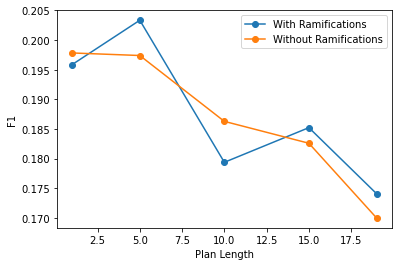

In [6]:
plt.plot(PLAN_LENGTHS, [d['result'] for d in by_length_with_ram.values()], '-o', label='With Ramifications')
plt.plot(PLAN_LENGTHS, [d['result'] for d in by_length_without_ram.values()], '-o', label='Without Ramifications')
plt.xlabel('Plan Length')
plt.ylabel('F1')
plt.legend()

In [7]:
def by_prompt_type_data(data_all, model, subs, domain, question_category, ramifications):
    by_prompt_type = {}
    for prompt_type in PROMPT_TYPES:
        data = {}
        for length in PLAN_LENGTHS:
            stats = TrueFalseStats(data_all, 
                                    plan_length=length, question_category=question_category, ramifications=ramifications, 
                                    model_name=model, prompt_type=prompt_type, domain=domain, substitutions=subs, score_type='f1')
            data[length] = stats.compute()
        by_prompt_type[prompt_type] = data
    return by_prompt_type

domain = ALL_DOMAINS_KEY
question_category = ALL_CATEGORIES_KEY

Text(0.5, 1.0, 'with_random_sub, without_ramifications')

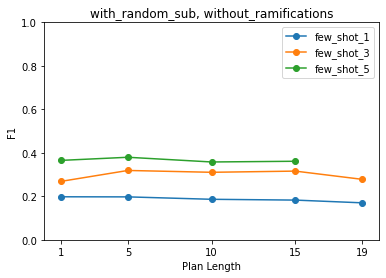

In [8]:
subs = WITH_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS

data = by_prompt_type_data(data_all, model, subs, domain, question_category, ramifications)
for prompt_type, by_length in data.items():
    plt.plot(PLAN_LENGTHS, [d['result'] for d in by_length.values()], '-o', label=prompt_type)
plt.xlabel('Plan Length')
plt.ylabel('F1')
plt.legend()
plt.xlim([0,20])
plt.ylim([0,1])
plt.xticks([1, 5, 10, 15, 19])
plt.title(f'{subs}, {ramifications}')

Text(0.5, 1.0, 'without_random_sub, without_ramifications')

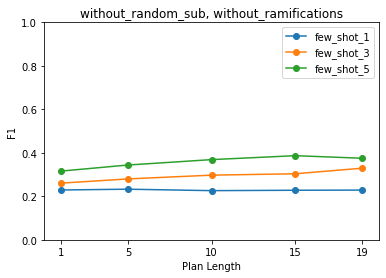

In [9]:
subs = WITHOUT_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS

data = by_prompt_type_data(data_all, model, subs, domain, question_category, ramifications)
for prompt_type, by_length in data.items():
    plt.plot(PLAN_LENGTHS, [d['result'] for d in by_length.values()], '-o', label=prompt_type)
plt.xlabel('Plan Length')
plt.ylabel('F1')
plt.legend()
plt.ylim([0,1])
plt.xlim([0,20])
plt.xticks([1, 5, 10, 15, 19])
plt.title(f'{subs}, {ramifications}')

In [ ]:
prompt_type = 'few_shot_1'
subs = WITHOUT_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS
domain = ALL_DOMAINS_KEY

by_question_category = {}
for question_category in QUESTION_CATEGORIES:
    data = {}
    for length in PLAN_LENGTHS:
        stats = TrueFalseStats(data_all, plan_length=length, question_category=question_category, ramifications=ramifications, 
                                        model_name=model, prompt_type=prompt_type, domain=domain, substitutions=subs, score_type='f1')
        data[length] = stats.compute()
    by_question_category[question_category] = data

In [ ]:
for data_type, by_length in by_question_category.items():
    plt.plot(PLAN_LENGTHS, [d['result'] for d in by_length.values()], '-o', label=data_type)
plt.xlabel('Plan Length')
plt.ylabel('F1')
plt.legend()
plt.xlim([0,20])
# plt.ylim([0,1])
plt.xticks([1, 5, 10, 15, 19])
plt.title(f'{domain}, {subs}, {ramifications}, {prompt_type}')